In [10]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Append the absolute path of the root directory of the project
notebook_path = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_path, '..', '..'))

# Add the root directory to sys.path
sys.path.append(project_root)

# Import project modules
from src.config import TEST_DIR
from src.data.preprocess import DataPreprocessor
from src.models.train_model import ModelTrainer
from src.models.predict_model import ModelPredictor

In [17]:
# 1. Load and preprocess the data
preprocessor = DataPreprocessor(TEST_DIR)
preprocessor.clean_data()
preprocessor.split_data(test_size=0.2)

print(f"Training set size: {len(preprocessor.X_train)}")
print(f"Test set size: {len(preprocessor.X_test)}")

Training set size: 3876
Test set size: 970


In [18]:
# 2. Vectorize the text data
(X_train_vec, X_test_vec), vectorizer = preprocessor.vectorize_text()
print(f"Feature vector shape: {X_train_vec.shape}")

Feature vector shape: (3876, 20000)


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.6008 - loss: 0.9384 - val_accuracy: 0.6814 - val_loss: 0.7480
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.8207 - loss: 0.4312 - val_accuracy: 0.7206 - val_loss: 0.7908
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9737 - loss: 0.1001 - val_accuracy: 0.7227 - val_loss: 1.0628
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9897 - loss: 0.0420 - val_accuracy: 0.7258 - val_loss: 1.1909


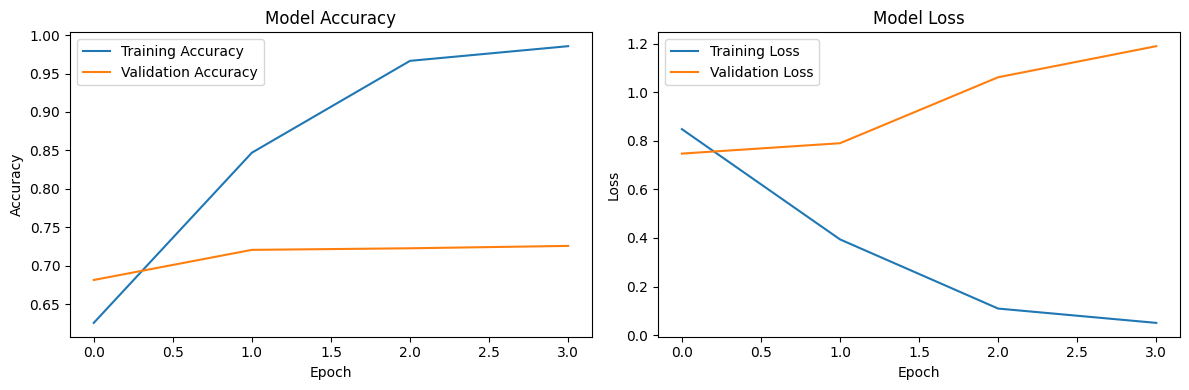

In [23]:
# 3. Train the neural network
trainer = ModelTrainer()
model = trainer.train_neural_network(
    X_train_vec, 
    preprocessor.y_train,
    X_test_vec, 
    preprocessor.y_test,
    epochs=10, 
    batch_size=32,
)

In [24]:
# 4. Make predictions
predictor = ModelPredictor()
pred_probs, pred_labels = predictor.predict_neural_network(X_test_vec, trainer)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [26]:
# 5. Evaluate the model
print("\nNeural Network Model Evaluation:")
sentiments = preprocessor.label_encoder.classes_
report = classification_report(
    preprocessor.y_test, 
    pred_labels, 
    target_names=sentiments
)
print(report)


Neural Network Model Evaluation:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       121
     neutral       0.74      0.91      0.82       576
    positive       0.51      0.49      0.50       273

    accuracy                           0.68       970
   macro avg       0.42      0.47      0.44       970
weighted avg       0.59      0.68      0.63       970



d:\Documents\CODE\HCMUT\Machine Learning Assignment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Documents\CODE\HCMUT\Machine Learning Assignment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Documents\CODE\HCMUT\Machine Learning Assignment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

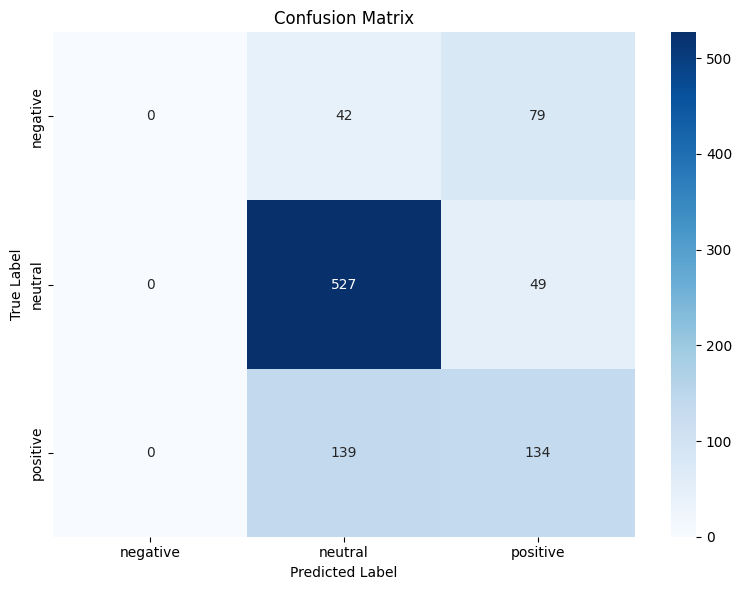

In [27]:
# 6. Plot confusion matrix
cm = confusion_matrix(preprocessor.y_test, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=sentiments, 
    yticklabels=sentiments
)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [28]:
# 7. Try making predictions on new data
# Example with a few sample headlines
sample_headlines = [
    "Company reports record profits in Q1",
    "Stock market crashes amid economic uncertainty",
    "New product launch exceeds expectations"
]

In [30]:
# Preprocess and vectorize the new data
sample_clean = [preprocessor.clean_text(headline) for headline in sample_headlines]
sample_vec = vectorizer.transform(sample_clean)

# Predict
sample_probs, sample_labels = predictor.predict_neural_network(sample_vec, trainer)

# Display results
for headline, sentiment in zip(sample_headlines, sample_labels):
    print(f"Headline: {headline}")
    print(f"Predicted sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Headline: Company reports record profits in Q1
Predicted sentiment: 2

Headline: Stock market crashes amid economic uncertainty
Predicted sentiment: 1

Headline: New product launch exceeds expectations
Predicted sentiment: 1

